# Imbalanced Dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


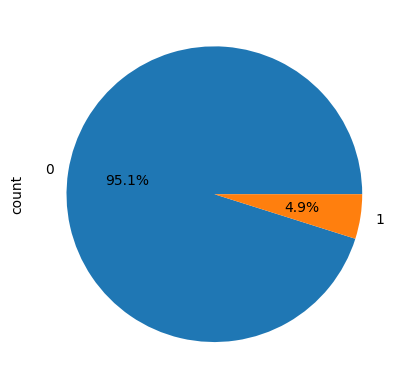

In [4]:
import matplotlib.pyplot as plt

data = df['stroke'].value_counts()
data.plot(kind="pie", autopct='%1.1f%%')
plt.show()

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# random under sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

under_sampling = RandomUnderSampler(random_state=0)
df_X = df.drop(['id', 'stroke'],axis=1)
df_y = df[['stroke']]

le = LabelEncoder()
df_y = le.fit_transform(df_y)

# impute missing values
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

# categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_resampled, y_resampled = under_sampling.fit_resample(X_train, y_train)

print('sebelum undersamping:')
print(pd.DataFrame(y_train).value_counts())
print('sesudah undersamping:')
print(pd.DataFrame(y_resampled).value_counts())

sebelum undersamping:
0
0    3663
1     169
Name: count, dtype: int64
sesudah undersamping:
0
0    169
1    169
Name: count, dtype: int64


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_36429/3375769495.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)


In [10]:
df_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [11]:
df_y = df[['stroke']]
df_y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


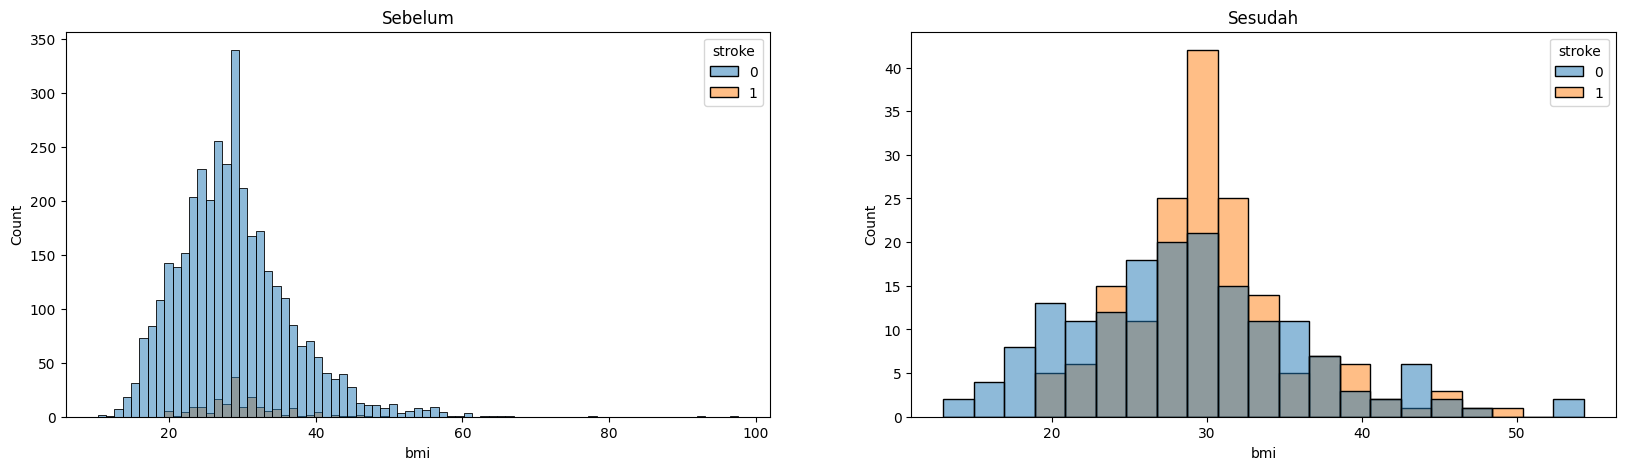

In [14]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori = pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_resampled = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_resampled = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_resampled, dfy_resampled], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df_sebelum, x='bmi', hue='stroke', ax=ax[0]).set(title='Sebelum')
sns.histplot(data=df_sesudah, x='bmi', hue='stroke', ax=ax[1]).set(title='Sesudah')
plt.xticks(rotation='horizontal')
plt.show()



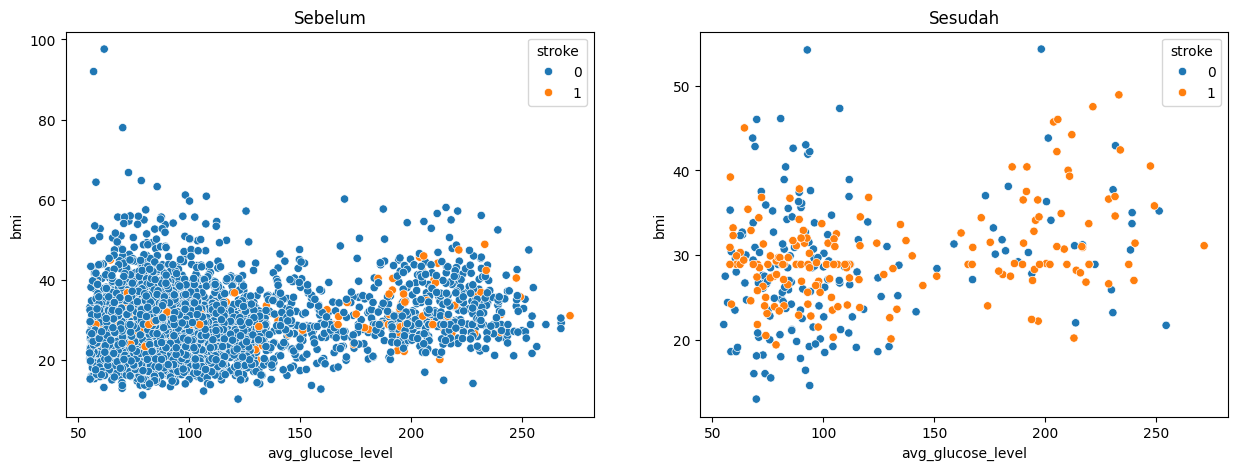

In [16]:
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df_sebelum, x='avg_glucose_level', y='bmi', hue='stroke', ax=ax[0]).set(title='Sebelum')
sns.scatterplot(data=df_sesudah, x='avg_glucose_level', y='bmi', hue='stroke', ax=ax[1]).set(title='Sesudah')
plt.show()

In [17]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

over_sampling = RandomOverSampler(random_state=0)
df_X = df.drop(['id', 'stroke'],axis=1)
df_y = df['stroke']

# impute missing values
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

# categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_resampled, y_resampled = over_sampling.fit_resample(X_train, y_train)

print('sebelum oversamping:')
print(pd.DataFrame(y_train).value_counts())
print('sesudah oversamping:')
print(pd.DataFrame(y_resampled).value_counts())

sebelum oversamping:
0  
0.0    3663
1.0     169
Name: count, dtype: int64
sesudah oversamping:
0  
0.0    3663
1.0    3663
Name: count, dtype: int64


/tmp/ipykernel_36429/4219961189.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)


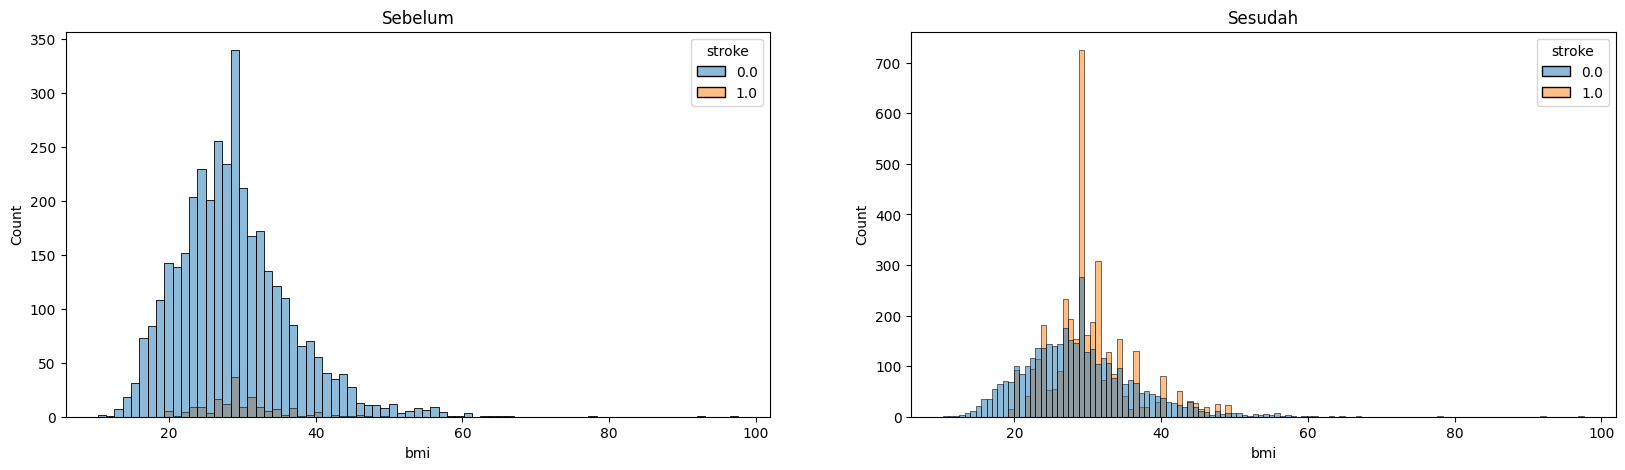

In [18]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori = pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_resampled = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_resampled = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_resampled, dfy_resampled], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df_sebelum, x='bmi', hue='stroke', ax=ax[0]).set(title='Sebelum')
sns.histplot(data=df_sesudah, x='bmi', hue='stroke', ax=ax[1]).set(title='Sesudah')
plt.xticks(rotation='horizontal')
plt.show()

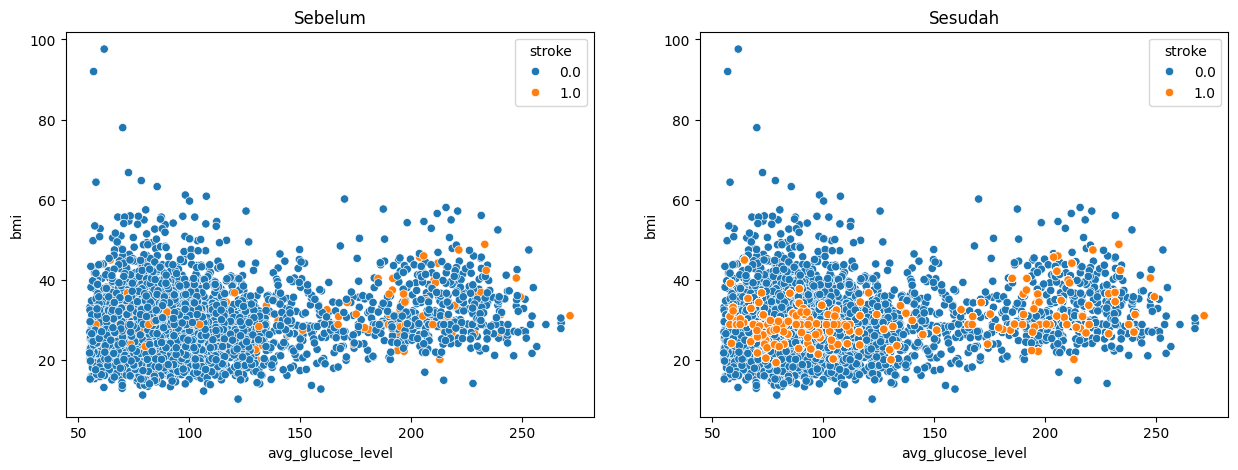

In [19]:
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df_sebelum, x='avg_glucose_level', y='bmi', hue='stroke', ax=ax[0]).set(title='Sebelum')
sns.scatterplot(data=df_sesudah, x='avg_glucose_level', y='bmi', hue='stroke', ax=ax[1]).set(title='Sesudah')
plt.xticks(rotation='horizontal')
plt.show()

In [29]:
# smote
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

smote = SMOTE(random_state=0)

df_X = df.drop(['id', 'stroke'],axis=1)
df_y = df['stroke']

# impute missing values
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

# categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('sebelum smote:')
print(pd.DataFrame(y_train).value_counts())
print('sesudah smote:')
print(pd.DataFrame(y_resampled).value_counts())

sebelum smote:
0  
0.0    3663
1.0     169
Name: count, dtype: int64
sesudah smote:
0  
0.0    3663
1.0    3663
Name: count, dtype: int64


/tmp/ipykernel_36429/2511903157.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)


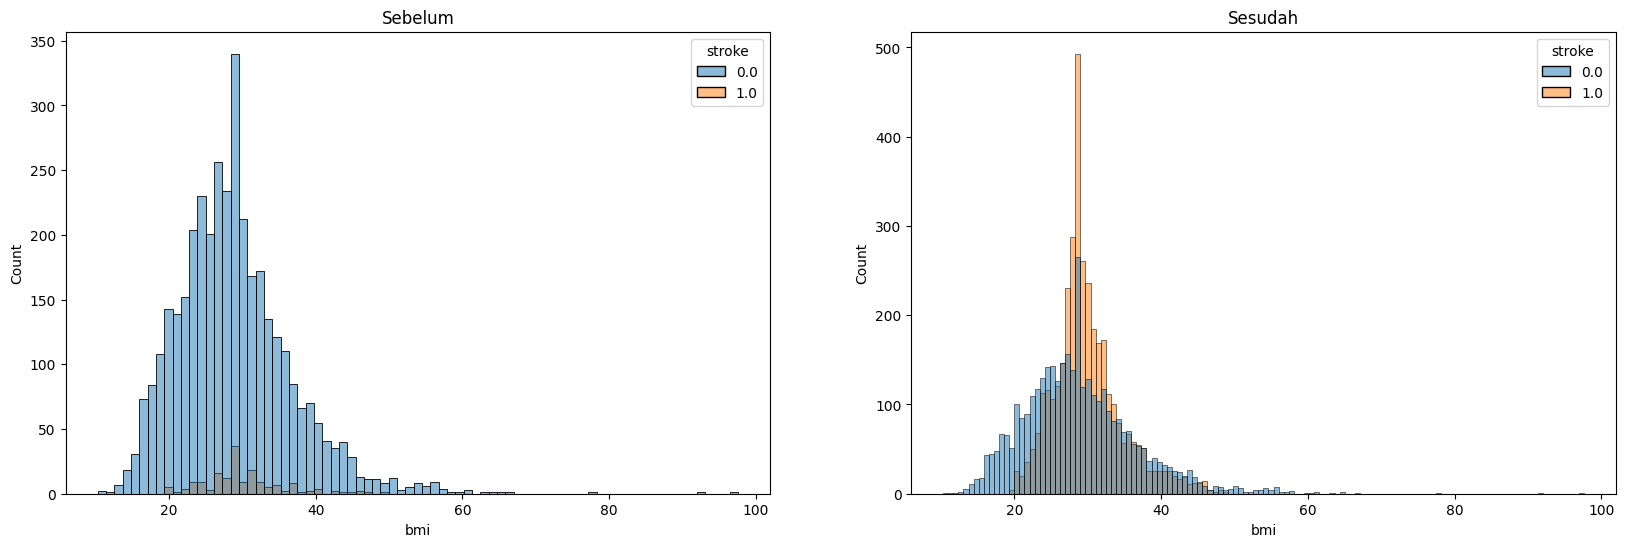

In [30]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(20, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum')
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah')
plt.xticks()
plt.show()


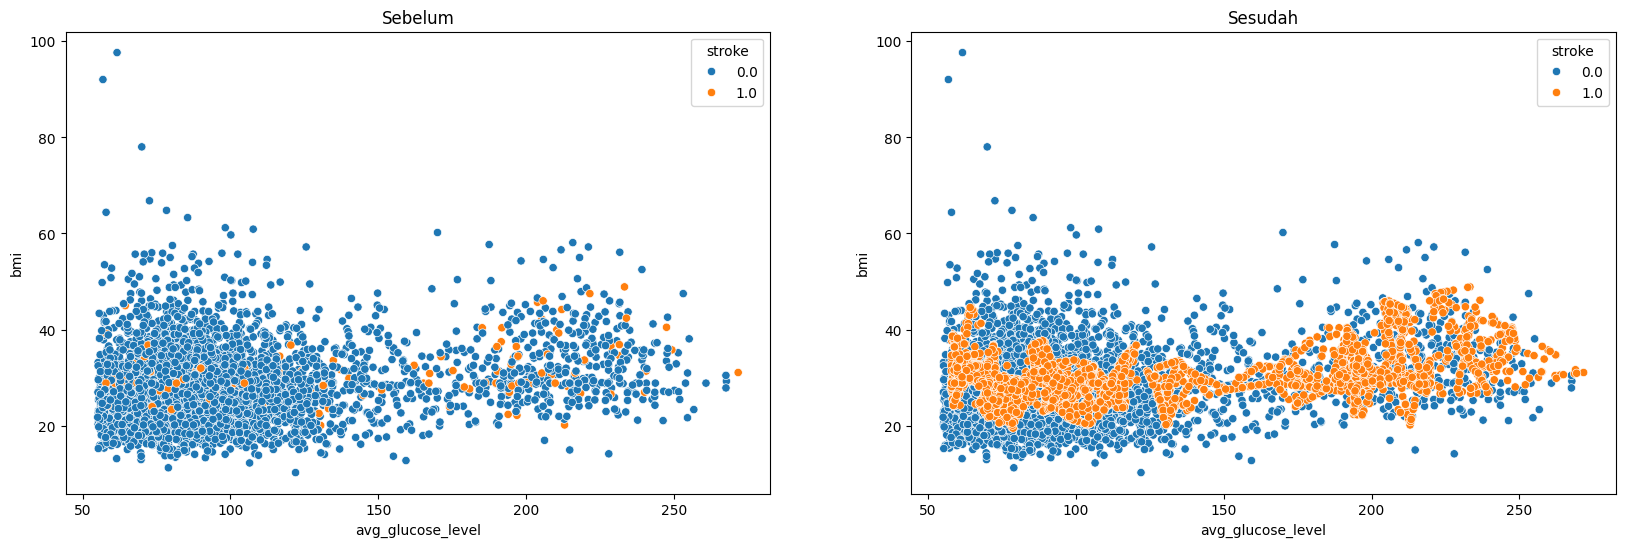

In [31]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(20, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum')
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah')
plt.xticks()
plt.show()

In [32]:
# ADASYN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_X = df.drop(['id', 'stroke'],axis=1)
df_y = df['stroke']

# impute missing values
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

# categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

# adasyn
adasyn = ADASYN(random_state=0)

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

print('sebelum adasyn:')
print(pd.DataFrame(y_train).value_counts())
print('sesudah adasyn:')
print(pd.DataFrame(y_resampled).value_counts())

sebelum adasyn:
0  
0.0    3663
1.0     169
Name: count, dtype: int64
sesudah adasyn:
0  
1.0    3676
0.0    3663
Name: count, dtype: int64


/tmp/ipykernel_36429/1642218971.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)


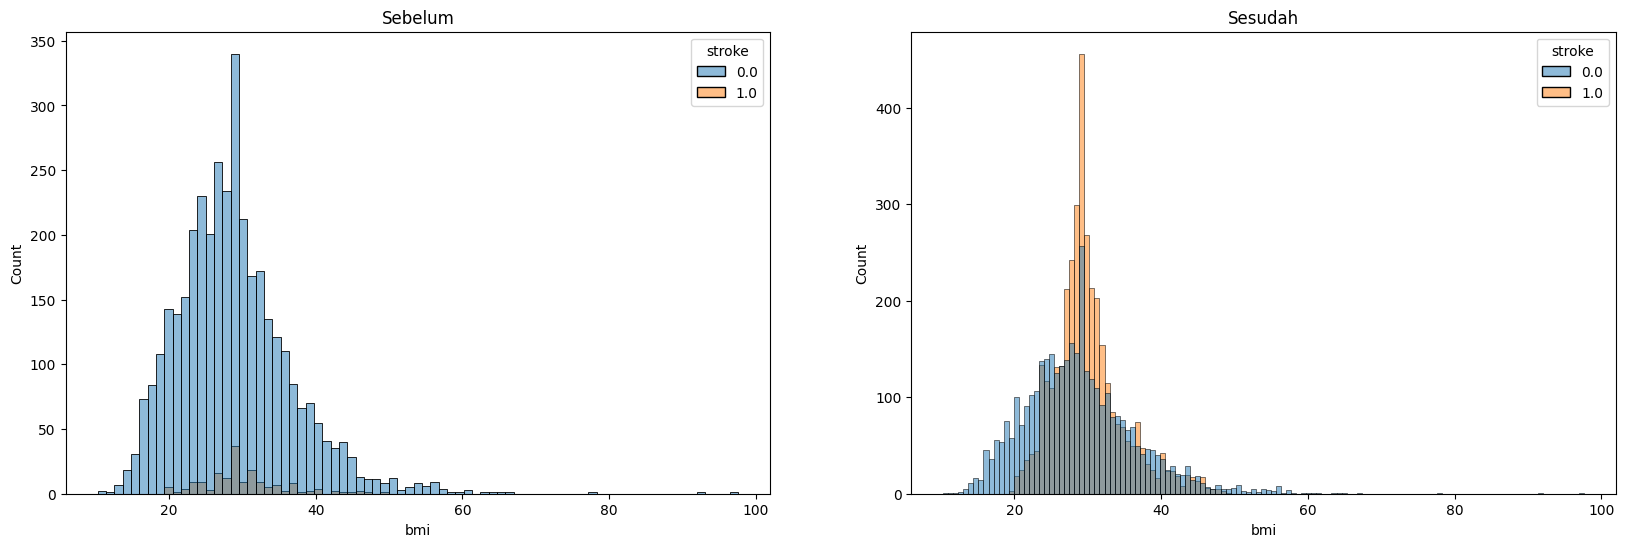

In [33]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(20, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum')
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah')
plt.xticks()
plt.show()

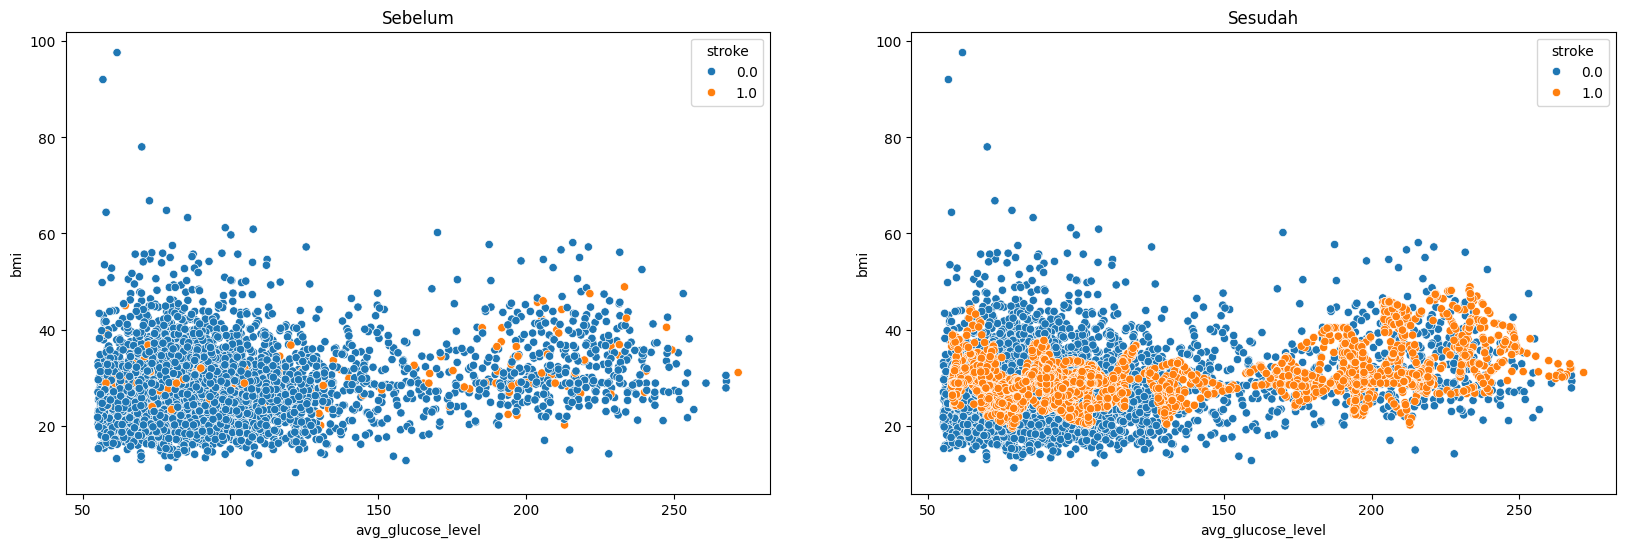

In [34]:
import seaborn as sns

f, axes = plt.subplots(1,2, figsize=(20, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum')
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah')
plt.xticks()
plt.show()